#most of the code is from: https://colab.research.google.com/github/spmallick/learnopencv/blob/master/PyTorch-Segmentation-torchvision/intro-seg.ipynb#scrollTo=shnC_YQLeQ1v

In [1]:
#import of the correct modules
#networks 
from torchvision import models


#other stuff
from PIL import Image
import matplotlib.pyplot as plt
import torch
import h5py
import numpy as np
import random

import torchvision.transforms as T

In [2]:
#import of network Resnet-101
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [3]:
#import of the satellite images

#position of the dataset
dset = h5py.File("dataset_test.h5","r")
#Access to the input data
RGB = dset["RGB"]
# for this example only the RGB data layers will be used!!!
#NIR = dset["NIR"]

print('Size of data set: ')
print(np.shape(RGB))
print('Number of images, width, height, number of channels')

Size of data set: 
(3, 10980, 10980, 3)
Number of images, width, height, number of channels


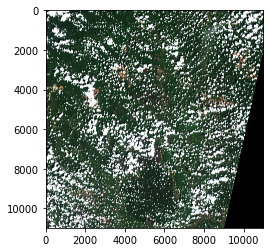

In [4]:
plt.imshow(RGB[1,:,:,:3])
plt.show()

In [5]:
#function to cut patches of the size 256 to 256
#index contains the following (image number (0-2), x-coord upper left pixel, y-coord upper right pixel)
def cutter256(index):
    patchSize = 256
    #cahnge from ndarray to image
    out = Image.fromarray(RGB[index[0],index[1]:index[1]+patchSize,index[2]:index[2]+patchSize])
    return out

In [6]:
# function?? for preperation of the image batch --> change it to a tensor
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])

In [22]:
#neuronal netowrk  
out = fcn(inp)['out']
print (out.shape)

torch.Size([1, 21, 224, 224])


In [30]:
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[0]


In [ ]:
startPixel = 0
endPixel = 10724
batchSize = 256

x_coord = np.arange(startPixel,endPixel,batchSize)
y_coord = np.arange(startPixel,endPixel,batchSize)

counter = 0
#iterate over first image
for m in x_coord:
    for n in y_coord:
        index = np.array([1,m,n])
        inp = trf(cutter256(index)).unsqueeze(0)
        
        #network
        out = fcn(inp)['out']
        om = torch.argmax(out.squeeze(),dim = 0).detach().cpu().numpy()
        rgb = decode_segmap(om)
        im = Image.fromarray(rgb)
        path = './test_output/your_file_'+str(counter)+'.jpeg'
        im.save(path)
        print(counter)
        counter = counter +1
        
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


SyntaxError: invalid syntax (Temp/ipykernel_15752/570755623.py, line 1)

xgboost, lightgbm

In [93]:
counter = 0
while counter < 1000:
    index = np.array([random.randint(0,2),random.randint(0,10724),random.randint(0,10724)])
    #cut out image from original image
    inp = trf(cutter256(index)).unsqueeze(0)
    #network
    out = fcn(inp)['out']
    om = torch.argmax(out.squeeze(),dim = 0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    im = Image.fromarray(rgb)
    path = './test_output/your_file_'+str(counter)+'.jpeg'
    im.save(path)
    print(counter)
    counter = counter + 1




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [30]:
#function to visualize the labels of the network 
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

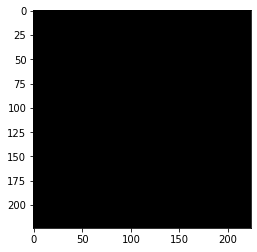

In [32]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [34]:
im = Image.fromarray(rgb)
im.save("your_file.jpeg")